<a href="https://colab.research.google.com/github/LucioFassarella/AMC/blob/main/Qiskit_AMC_Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color="darkgreen"><b>Perceptron</b></font>
*   [ [Mitchell, 1997](https://github.com/lyhhhhhhhhhhh/awesome-machine-learning-1/blob/master/Machine-Learning%E3%80%8A%5BMachine%20Learning%E3%80%8BTom.Mitchell.pdf) ] Tom M. Mitchell: <i>Machine Learning</i>. McGraw-Hill, 1997.
*   Biblioteca de Machine Learning: [aqui](https://github.com/lyhhhhhhhhhhh/awesome-machine-learning-1/tree/master).


Considere uma coleção $\mathcal{F} \subset \mathbb{R}^2$ munido de uma <i>classificação binária</i> $f$:

$$
f: \mathcal{F} \rightarrow \left\{-1, 1\right\}, \ f(\vec{\zeta}) = \sigma\ \ (\pm 1).
$$
Aqui, dizemos que $\mathcal{F}$ é um <i>conjunto caracterizado (features)</i>.



*   <font color = "darkgreen"><b>Classificadores lineares</b></font> de $\mathcal{F}$ são retas em $\mathbb{R}^2$
$$
u_0 + \vec{u}\cdot \vec{x} = 0
$$
com coeficientes
$$
u_0 \in \mathbb{R}\ \ \text{e}\ \ \vec{u} \in \mathbb{R}^2.
$$
<b>Notação</b> para simplificar:
$$
\vec{\omega} = (u_0,\vec{u}) \in \mathbb{R}^{1 + 2}
$$
e
$$
\vec{\omega} \cdot \vec{x} = \omega_0 + u_1 x_1 + u_2 x_2.
$$
> <font color="grey" >Equivalentemente:
$$
\mathcal{F} \ni (x_1,x_2) \mapsto \vec{x} := (1,x_1,x_2).
$$
</font>

*   <b>Classificador linear fiel de $\mathcal{F}$</b> é um classificador linear $(u_0,\vec{u})$ tal que:
$$
f(\vec{\zeta})(\vec{\omega} \cdot \vec{\zeta}) > 0,\ \forall \vec{\zeta} \in
\mathcal{F}.
$$
> Geometricamente, um classificador linear fiel de $\mathcal{F}$ divide o plano $\mathbb{R}^2$ em dois semiplanos (separados pelo classificador) em que um deles contem os elementos de uma classe e o outro contem os elementos da outra classe:
$$
\mathrm{sinal} (\vec{\omega} \cdot \vec{\zeta}) = f(\zeta),\ \forall \vec{\zeta}\in \mathcal{F}.
$$

* <b>Função de ativação</b> (Heaviside = $\mathrm{sinal}$):
$$
\Theta: \mathbb{R} \rightarrow \left\{ -1, 1\right\},\ \Theta(s) = \left\{%
\begin{array}{ll}
-1, & s \le 0,\\
+1, & s \ge 0.
\end{array}
\right.
$$

*   <b>Aprendizado de máquina</b> é um processo automático para construir classificadores lineares fieis.
> Nesse contexto, o aprendizado de máquina corresponde a determinar parâmetros $\vec{\omega} \in \mathbb{R}^{1+2}$ que reproduzem a ação de $f$ via composição com a função de ativação:
$$
\Theta(\vec{\omega}\cdot \vec{\zeta}) = f(\zeta),\ \forall \zeta \in \mathcal{F}.
$$

*   <b>Perceptron</b> é um algoritmo de aprendizado de máquina capaz de construir classificadores lineares fiéis para conjuntos caracterizados que possuem classificadores lineares fiéis. Ele consiste em um processo iterativo para ajuste dos coeficientes $\vec{\omega}$ do classificador linear, partindo de um classificador linear inicial (qualquer).
> O Perceptron é uma rede neural de camada única. Ele tanto serve para resolver problemas de classificação linear, tanto quanto para compor redes neurais multicamadas.

*   <b>Função de perda (*loss function*)</b>: função que mede erros de classificação de um classificador linear com parâmetros $\vec{\omega}$:
$$
L_\vec{\omega}: \mathcal{F} \rightarrow \mathbb{R},\ L_\vec{\omega}(\vec{\zeta}):= f(\vec{\zeta}) (\vec{\omega}\cdot \vec{\zeta}) = f(\vec{\zeta})(u_0 +u_1 \zeta_1 + u_2 \zeta_2).
$$
> <b>Lema</b>: $\vec{\omega} \in \mathbb{R}^3$ é um classificador linear fiel de $\mathcal{F}$ sse:
$$
L_{\vec{\omega}}(\vec{\zeta}) >0,\ \forall \vec{\zeta} \in \mathcal{F}.
$$

<b>Regra de Treinamento do Perceptron</b>:

Dada uma <i>taxa de aprendizagem</i> $\eta >0$:

$$
\vec{\omega} \in \mathbb{R}^{1+2},\ \vec{\zeta}\in \mathcal{F} \leadsto\ %
\vec{\omega}' = \vec{\omega} + \eta\left( f(\zeta) - \vec{\omega}\cdot \vec{\zeta} \right)\vec{\zeta}.
$$
Em componentes:
$$
\left\{%
\begin{array}{l}
    u_0' := u_0 +  \eta\left\lbrack f(\vec{\zeta}) - \Theta(u_0 + \vec{u}\cdot \vec{\zeta})\right\rbrack 1\\
   \vec{u}' := \vec{u} + \eta\left\lbrack f(\vec{\zeta})- \Theta(u_0 + \vec{u}\cdot \vec{\zeta}) \right\rbrack \vec{\zeta}.
\end{array}
\right.
$$

> <font color="gray">Prova da redução do erro:
$$
a
$$
</font>


In [ ]:
import numpy as np

def loss(x, y , u, b):
    '''
    Função de perda

    Entradas:
        x (list).: vetor/ponto (coordenadas de um dado)
        y (int)..: classificação do ponto
        u (list).: vetor (veteor ortogonal ao hiperespaço de separação)
        b (float): viés (coeficiente independente da equação do hiperspaço de classificação)

    Saída:
        float: valor da função de perda
    '''

    return y*(np.dot(u, x) + b)

def perceptron(x, y, u, b):
    '''
    Perceptron

    Entradas:
        x (list).: vetor/ponto (coordenadas de um dado)
        y (int)..: classificação do ponto
        u (list).: vetor (veteor ortogonal ao hiperespaço de separação)
        b (float): viés (coeficiente independente da equação do hiperspaço de classificação)

    Saída:
        u_prime (list).: vetor (vetor ortogonal ao hiperespaço de separação)
        b_prime (float): viés (coeficiente independente da equação do hiperspaço de classificação)
    '''

    x = np.array(x) # Convert x to a NumPy array
    u_prime = u + y*x
    b_prime = b + y

    return u_prime, b_prime

def fit(X, Y, T):
    '''
    Treinamento do Perceptron

    Entradas:
        X (list): lista Python ou array NumPy
        Y (list): lista Python ou array NumPy com comprimento igual ao de X
                 cujas entradas têm valores -1 ou +1
        T (int): número de iterações

    Saída:
        u_prime (list).: vetor (vetor ortogonal ao hiperespaço de separação)
        b_prime (float): viés (coeficiente independente da equação do hiperspaço de classificação)
    '''

    dim = len(X[0])
    u = np.zeros(dim)
    b = 0

    for t in range(T):
        for i in range(len(X)):
            if loss(X[i], Y[i], u, b) <= 0:
                u, b = perceptron(X[i], Y[i], u, b)

    return u, b

# Exemplo 1


*   Distribuição de pontos em $\mathbb{R}^2$ catalogados em duas categorias e separáveis por um classificador linear.

$$
\downarrow \ \downarrow \ \downarrow \ \downarrow \ \downarrow \ \downarrow \ \downarrow
$$

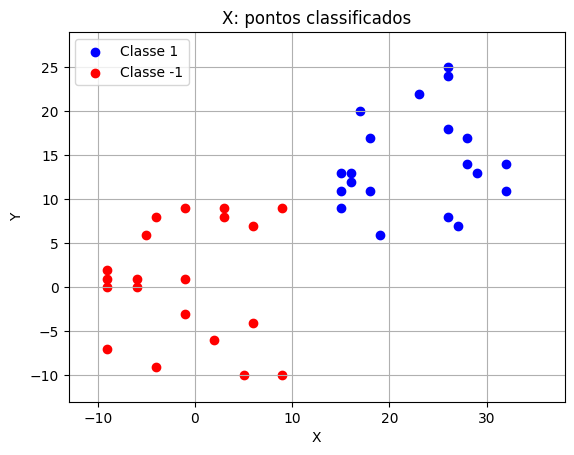

In [ ]:
import random
import matplotlib.pyplot as plt

m = 20
largura = 10
a = 2.5*largura
b = 1.6*largura
X0 = [[random.randrange(-largura,largura) + a, random.randrange(-largura,largura) + b] for k in range(m)]
X1 = [[random.randrange(-largura,largura), random.randrange(-largura,largura)] for k in range(m)]

# Plot

X = X0 + X1
Y = [-1]*m + [1]*m

X0_x = [p[0] for p in X0]; X0_y = [p[1] for p in X0]

X1_x = [p[0] for p in X1]; X1_y = [p[1] for p in X1]

plt.scatter(X0_x, X0_y, color='blue', label='Classe 1')
plt.scatter(X1_x, X1_y, color='red', label='Classe -1')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('X: pontos classificados')
plt.legend()
plt.grid(True)
plt.xlim((- 3 - largura, largura + a + 3))
plt.ylim((- 3 - largura, largura + b + 3))
plt.show()

O Perceptron retorna um classificador válido (provavelmente):

$$
\downarrow \ \downarrow \ \downarrow \ \downarrow \ \downarrow \ \downarrow \ \downarrow
$$

In [ ]:
T = 50
u0, u1 = fit(X,Y,T)
print(f"u0 = {u0}, u1 = {u1}")

u0 = [-2. -2.], u1 = 47


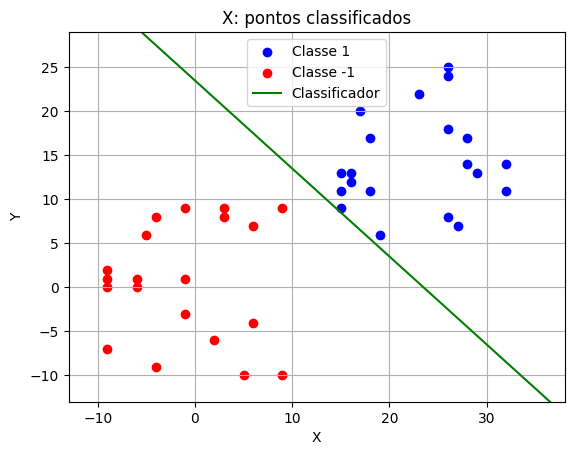

In [ ]:
# Plot

X = X0 + X1
Y = [-1]*m + [1]*m

X0_x = [p[0] for p in X0]; X0_y = [p[1] for p in X0]

X1_x = [p[0] for p in X1]; X1_y = [p[1] for p in X1]

x = np.linspace(-largura - a - 3, largura + a + 3, 100)
y = -(u0[0]*x + u1)/u0[1]

plt.scatter(X0_x, X0_y, color='blue', label='Classe 1')
plt.scatter(X1_x, X1_y, color='red', label='Classe -1')

plt.plot(x, y, color='green', label='Classificador')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('X: pontos classificados')
plt.legend()
plt.grid(True)
plt.xlim((- 3 - largura, largura + a + 3))
plt.ylim((- 3 - largura, largura + b + 3))
plt.show()

# Exemplo 2

*   Distribuição de pontos em $\mathbb{R}^2$ catalogados em duas categorias, mas não separáveis por um classificador linear:

$$
\downarrow \ \downarrow \ \downarrow \ \downarrow \ \downarrow \ \downarrow \ \downarrow
$$

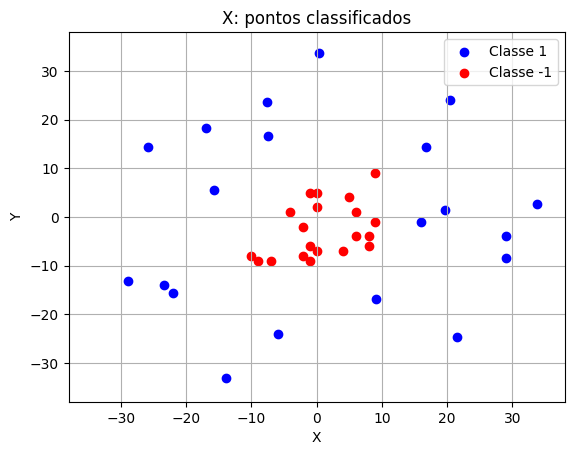

In [ ]:
import random
import matplotlib.pyplot as plt

m = 20
largura = 10
a = 2.5*largura
b = 2.5*largura
X0 = [[random.randrange(-largura,largura) + a*np.cos(k), random.randrange(-largura,largura) + b*np.sin(k)] for k in range(m)]
X1 = [[random.randrange(-largura,largura), random.randrange(-largura,largura)] for k in range(m)]

# Plot

X = X0 + X1
Y = [-1]*m + [1]*m

X0_x = [p[0] for p in X0]; X0_y = [p[1] for p in X0]

X1_x = [p[0] for p in X1]; X1_y = [p[1] for p in X1]

plt.scatter(X0_x, X0_y, color='blue', label='Classe 1')
plt.scatter(X1_x, X1_y, color='red', label='Classe -1')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('X: pontos classificados')
plt.legend()
plt.grid(True)
plt.xlim((- largura - a - 3, largura + a + 3))
plt.ylim((- largura - b - 3, largura + b + 3))
plt.show()

O Perceptron retorna um classificador falho:

$$
\downarrow \ \downarrow \ \downarrow \ \downarrow \ \downarrow \ \downarrow \ \downarrow
$$

In [ ]:
T = 10
u0, u1 = fit(X,Y,T)
print(f"u0 = {u0}, u1 = {u1}")

u0 = [ 4.41331721 -7.33111386], u1 = -14


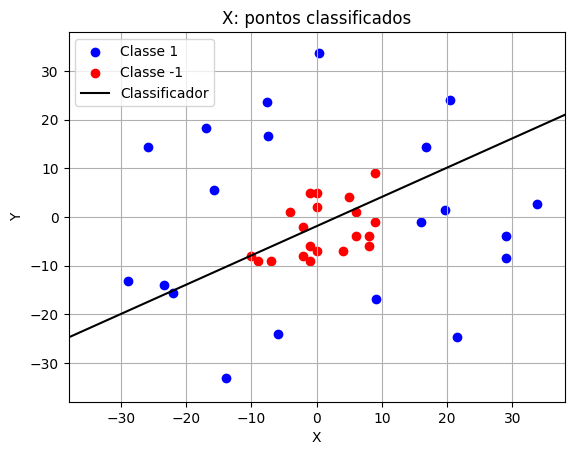

In [ ]:
# Plot

X0_x = [p[0] for p in X0]; X0_y = [p[1] for p in X0]

X1_x = [p[0] for p in X1]; X1_y = [p[1] for p in X1]

x = np.linspace(-largura - a - 3, largura + a + 3, 100)
y = -(u0[0]*x + u1)/u0[1]

plt.scatter(X0_x, X0_y, color='blue', label='Classe 1')
plt.scatter(X1_x, X1_y, color='red', label='Classe -1')

plt.plot(x, y, color='black', label='Classificador')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('X: pontos classificados')
plt.legend()
plt.grid(True)
plt.xlim((- largura - a -3, largura + a + 3))
plt.ylim((- largura - b - 3, largura + b + 3))
plt.show()

O Método Kernel pode transformar uma classificação não-linear em 2D em uma classificação linear em 3D

In [ ]:
import numpy as np

def cone(x0,x1,c):
    return [x0,x1,c*np.sqrt(x0**2 + x1**2)]

def loss3D(x, y , u, b):
    return y*(np.dot(u, x) + b)

def perceptron3D(x, y, u, b):
    '''
    Perceptron
    '''
    x = np.array(x) # Converte a lista x para uma array NumPy
    u_prime = u + y*x
    b_prime = b + y

    return u_prime, b_prime

def fit(X, Y, T):
    '''
    X = [[x0,x1,x2]] : lista Python ou array NumPy 3D
    Y = [y]: array NumPy 3D com comprimento igual ao de X
    T = número de iterações (int)
    '''

    X = np.array(X) # Convert X to a NumPy array
    dim = len(X[0])
    comprimento = len(X)

    if comprimento != len(Y):
        print("Erro")
        return None


    # Treinamento do Perceptron

    u = np.zeros(dim)
    b = 0

    for t in range(T):
        for i in range(len(X)):
            if loss3D(X[i], Y[i], u, b) <= 0:
                u, b = perceptron3D(X[i], Y[i], u, b)

    return u, b

In [ ]:
# Projeção dos pontos X no cone 3D

X = X0 + X1
Y = [-1]*m + [1]*m

c = 2
X3d = [ cone(X[j][0],X[j][1],c) for j in range(len(X))]

print(f"Tipo de X3d: {type(X3d)}")

Tipo de X3d: <class 'list'>


In [ ]:
# Perceptron

T = 20
u, b = fit(X3d,Y,T)
print(f"u = {u}, b = {b}")

u = [-37.31600258  -9.95079279  36.35006903], b = 78


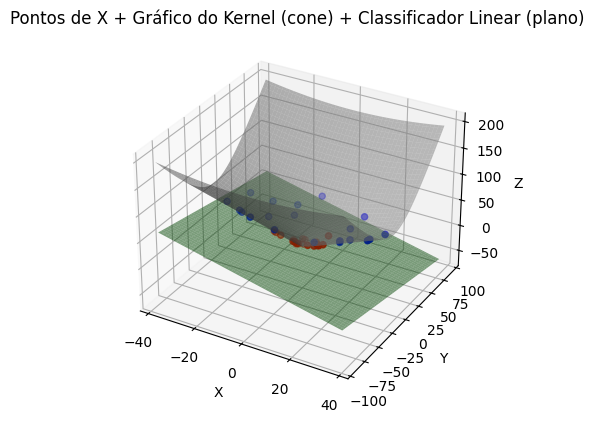

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# Pontos 3D

c = 2
X0_3d = np.array([kernel3D(x[0], x[1], c) for x in X0])
X1_3d = np.array([kernel3D(x[0], x[1], c) for x in X1])

# Create a meshgrid for the surface plot
x_surf = np.linspace(-largura - a - 3, largura + a + 3, 100)
y_surf = np.linspace(-largura - b - 3, largura + b + 3, 100)
X_surf, Y_surf = np.meshgrid(x_surf, y_surf)
Z_surf = c * np.sqrt(X_surf**2 + Y_surf**2)

Z_plano = (u[0]*X_surf + u[1]*Y_surf + b)/u[2]


# Plot 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X0_3d[:, 0], X0_3d[:, 1], X0_3d[:, 2], c='blue', label='Classe 0')
ax.scatter(X1_3d[:, 0], X1_3d[:, 1], X1_3d[:, 2], c='red', label='Classe 1')


ax.plot_surface(X_surf, Y_surf, Z_surf, alpha=0.5, color='gray')


ax.plot_surface(X_surf, Y_surf, Z_plano, alpha=0.5, color='green')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Pontos de X + Gráfico do Kernel (cone) + Classificador Linear (plano)')

plt.show()

# Exemplo 3

*   Perceptron para classificar bolas

Planilha de dados para baixar:

*   [Bolas.csv](https://drive.google.com/file/d/1PZwNIqi1pXzRIjFT_2qeQHO7LqDKrdcS/view?usp=drive_link)

In [ ]:
'''
Leitura da base de dados pelo pandas
e transformação em uma lista

'''

import pandas as pd # Importação da biblioteca pandas

# Identificação do arquivo numa pasta
csv_file_path = 'bolas.csv'

try:
    # Lê o arquivo CSV em um DataFrame do pandas
    df = pd.read_csv(csv_file_path)
    print("Leitura dos dados bem sucedida. As primeiras 5 linhas:")
    print(df.head())
except FileNotFoundError:
    print(f"Erro: O arquivo '{csv_file_path}' não foi encontrado.")
except Exception as e:
    print(f"Ocorreu um erro ao ler o arquivo CSV: {e}")


# Transformação do arquivo pandas em uma lista
data_list = df.values.tolist()

print("DataFrame convertido para lista:")
print(f"Total de {len(data_list)} linhas na lista.")
# Imprime as primeiras 5 entradas para não poluir muito a saída
for row in data_list[:5]:
    print(row)

Leitura dos dados bem sucedida. As primeiras 5 linhas:
   class  feature1  feature2
0     -1     1.760     0.400
1     -1     0.979     2.240
2     -1     1.870    -0.977
3     -1     0.950    -0.151
4     -1    -0.103     0.411
DataFrame convertido para lista:
Total de 200 linhas na lista.
[-1.0, 1.76, 0.4]
[-1.0, 0.979, 2.24]
[-1.0, 1.87, -0.977]
[-1.0, 0.95, -0.151]
[-1.0, -0.103, 0.411]


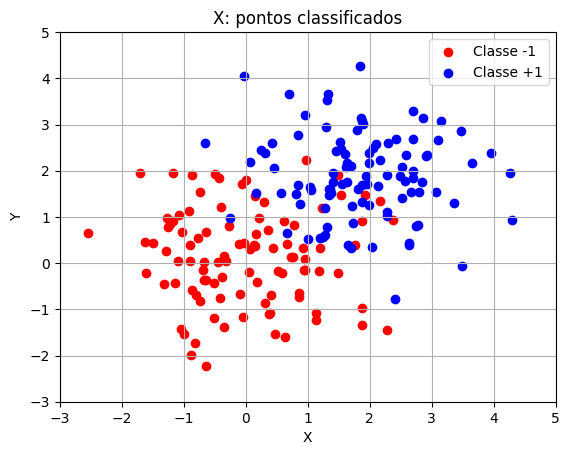

In [ ]:
'''
Plotagem dos dados
'''

import matplotlib.pyplot as plt

# Plot

pontos_negativos = []
pontos_positivos = []
for linha in data_list:
    if linha[0] == -1:
        pontos_negativos.append(linha)
    if linha[0] == 1:
        pontos_positivos.append(linha)

## Impressão dos pontos
# print(pontos_negativos)
# print(pontos_positivos)

pontos_negativos_x = [ponto[1] for ponto in pontos_negativos]
pontos_negativos_y = [ponto[2] for ponto in pontos_negativos]
pontos_positivos_x = [ponto[1] for ponto in pontos_positivos]
pontos_positivos_y = [ponto[2] for ponto in pontos_positivos]

# # Separação dos pontos
# pontos_negativos_x = [ponto[1] - 1 for ponto in pontos_negativos]
# pontos_negativos_y = [ponto[2]- 1 for ponto in pontos_negativos]
# pontos_positivos_x = [ponto[1] + 1  for ponto in pontos_positivos]
# pontos_positivos_y = [ponto[2] + 1 for ponto in pontos_positivos]

plt.scatter(pontos_negativos_x, pontos_negativos_y, color='red', label='Classe -1')
plt.scatter(pontos_positivos_x, pontos_positivos_y, color='blue', label='Classe +1')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('X: pontos classificados')
plt.legend()
plt.grid(True)
plt.xlim((- 3, 5))
plt.ylim((- 3, 5))
plt.show()

In [ ]:
# Identificação do tamanho da amostra

comprimento_negativos = len(pontos_negativos)
comprimento_positivos = len(pontos_positivos)

print(f"Número de pontos negativos: {comprimento_negativos}")
print(f"Número de pontos positivos: {comprimento_positivos}")

Número de pontos negativos: 100
Número de pontos positivos: 100


In [ ]:
import numpy as np

# Randomização dos pontos de treinamento
np.random.shuffle(data_list)

# Pontos de treinamento: 180 do total de 200
data_list_train = data_list[:180]


# Lista dos pontos e classificação

X_train = [data_list_train[i][1:] for i in range(len(data_list_train))]
print(X_train)
Y_train = [data_list_train[i][0] for i in range(len(data_list_train))]
print(Y_train)

T = 100
u, b = fit(X_train, Y_train, T)
print(f"u = {u}, b = {b}")

[[-0.907, 0.0519], [1.63, 1.76], [-1.1475, -0.4378], [2.49, 1.88], [-0.8131, -1.7263], [1.31, 3.54], [1.19, 0.534], [2.64, 0.383], [0.625, -1.6], [0.576, 1.51], [2.04, 0.343], [2.52, 1.42], [0.761, 0.122], [-0.498, 1.93], [0.396, -1.09], [0.979, 2.24], [0.729, 0.129], [2.93, 2.34], [1.98, 2.38], [-0.312, 0.0562], [2.91, 2.32], [3.47, 2.85], [0.523, -0.172], [-1.07, 1.05], [-0.6946, -0.1496], [0.857, -0.651], [0.466, -1.54], [-0.895, 0.387], [1.28, 1.19], [0.177, -0.402], [1.06, 1.59], [-1.29, 0.267], [0.864, -0.742], [-0.913, 1.12], [1.6, 2.37], [1.62, 2.09], [2.38, 0.944], [-0.7448, -0.8264], [-0.0682, 1.71], [0.444, 0.334], [-0.6725, -0.3596], [0.0665, 0.302], [1.27, 0.617], [-0.103, 0.411], [1.92, 1.48], [2.7, 2.0], [1.71, 1.24], [-1.1, 0.0522], [-0.403, 1.22], [-1.03, 0.682], [1.84, 4.26], [1.65, 0.384], [0.302, 2.39], [0.127, 0.402], [1.13, -1.08], [2.1, 2.58], [1.23, 1.2], [0.844, 2.78], [-0.354, -1.375], [1.88, 1.32], [2.75, 0.811], [3.07, 1.55], [1.19, 0.317], [2.28, 1.9], [3.1

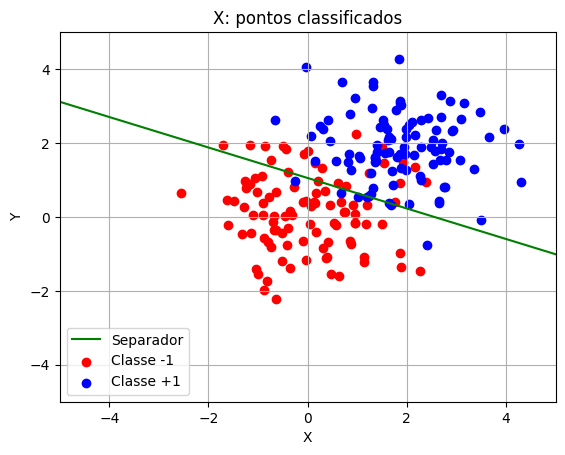

In [ ]:
'''
Plotagem
'''

# Plot da reta separadora
x = np.linspace(- 5, 5, 100)
y = -(u[0]*x + b)/u[1]
plt.plot(x, y, color = 'green', label = 'Separador')

# Plot dos pontos dados
pontos_negativos = []
for linha in data_list:
    if linha[0] == -1:
        pontos_negativos.append(linha)

pontos_negativos_x = [ponto[1] for ponto in pontos_negativos]
pontos_negativos_y = [ponto[2] for ponto in pontos_negativos]

pontos_positivos = []
for linha in data_list:
    if linha[0] == 1:
        pontos_positivos.append(linha)

pontos_positivos_x = [ponto[1] for ponto in pontos_positivos]
pontos_positivos_y = [ponto[2] for ponto in pontos_positivos]

plt.scatter(pontos_negativos_x, pontos_negativos_y, color='red', label='Classe -1')
plt.scatter(pontos_positivos_x, pontos_positivos_y, color='blue', label='Classe +1')

# Rótulos do gráfico
plt.xlabel('X')
plt.ylabel('Y')
plt.title('X: pontos classificados')
plt.legend()
plt.grid(True)
plt.xlim((- 5, 5))
plt.ylim((- 5, 5))
plt.show()